## 1. 데이터 불러오기

In [3]:
# 현재 디렉터리에 dirty_mnist라는 폴더 생성
!mkdir "./dirty_mnist"
#dirty_mnist.zip라는 zip파일을 dirty_mnist라는 폴더에 압축 풀기
!unzip "/Users/minguinho/Downloads/월간 데이콘/data_2/dirty_mnist.zip" -d "./dirty_mnist/"
# 현재 디렉터리에 test_dirty_mnist라는 폴더 생성
!mkdir "./test_dirty_mnist"
#test_dirty_mnist.zip라는 zip파일을 test_dirty_mnist라는 폴더에 압축 풀기
!unzip "/Users/minguinho/Downloads/월간 데이콘/data_2/test_dirty_mnist.zip" -d "./test_dirty_mnist/"

dirty_mnist/54545.png  
 extracting: ./test_dirty_mnist/54546.png  
 extracting: ./test_dirty_mnist/54547.png  
 extracting: ./test_dirty_mnist/54548.png  
 extracting: ./test_dirty_mnist/54549.png  
 extracting: ./test_dirty_mnist/54550.png  
 extracting: ./test_dirty_mnist/54551.png  
 extracting: ./test_dirty_mnist/54552.png  
 extracting: ./test_dirty_mnist/54553.png  
 extracting: ./test_dirty_mnist/54554.png  
 extracting: ./test_dirty_mnist/54555.png  
 extracting: ./test_dirty_mnist/54556.png  
 extracting: ./test_dirty_mnist/54557.png  
 extracting: ./test_dirty_mnist/54558.png  
 extracting: ./test_dirty_mnist/54559.png  
 extracting: ./test_dirty_mnist/54560.png  
 extracting: ./test_dirty_mnist/54561.png  
 extracting: ./test_dirty_mnist/54562.png  
 extracting: ./test_dirty_mnist/54563.png  
 extracting: ./test_dirty_mnist/54564.png  
 extracting: ./test_dirty_mnist/54565.png  
 extracting: ./test_dirty_mnist/54566.png  
 extracting: ./test_dirty_mnist/54567.png  
 extract

## 2. Library Import

In [2]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import RMSprop

## 3. Dataset 구성

In [3]:
import csv

# 답지
with open("/Users/minguinho/Downloads/월간 데이콘/data_2/dirty_mnist_answer.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    one_hot_answer_list = []
    is_Skip = True
    for row in reader:
        if is_Skip == True:
            is_Skip = False
            continue
        one_hot_answer = []
        for i in range(1, len(row)):
            # print(len(row))
            one_hot_answer.append(int(row[i]))
        one_hot_answer_list.append(one_hot_answer)

    # one_hot_answer_list = one_hot_answer_list[1:]
    print(one_hot_answer_list[0]) # 답지 들어있음


[1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1]


In [4]:
alphabet = []
for i in range(0, 26):
    alphabet.append(chr(97 + i))

print(alphabet)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [5]:
# 이미지
train_data_list = os.listdir('/Users/minguinho/Downloads/월간 데이콘/dirty_mnist')
test_data_list = os.listdir('/Users/minguinho/Downloads/월간 데이콘/test_dirty_mnist')

print('훈련 이미지 개수 :', len(train_data_list))
print('테스트 이미지 개수 :', len(test_data_list))

훈련 이미지 개수 : 50000
테스트 이미지 개수 : 5000


In [6]:
# 데이터 전처리
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tqdm.notebook import tqdm

train_image_list = np.zeros( (len(train_data_list), 256, 256, 3) )
test_image_list = np.zeros( (len(test_data_list), 256, 256, 3) )

print('train data')
for i in tqdm(range(0, len(train_data_list))):
    path = '/Users/minguinho/Downloads/월간 데이콘/dirty_mnist/'+ train_data_list[i]
    split_str = train_data_list[i].split('.')
    file_index = int(split_str[0])

    img = image.load_img(path, target_size=(256, 256, 3))
    img = image.img_to_array(img)
    img = img/255.0
    train_image_list[file_index] = img

print('test data')
for i in tqdm(range(0, len(test_data_list))):
    path = '/Users/minguinho/Downloads/월간 데이콘/test_dirty_mnist/'+ test_data_list[i]
    split_str = test_data_list[i].split('.')
    file_index = int(split_str[0]) - 50000

    img = image.load_img(path, target_size=(256, 256, 3))
    img = image.img_to_array(img)
    img = img/255.0
    test_image_list[file_index] = img


train data



test data


a b d f k l o p r s u x y z 


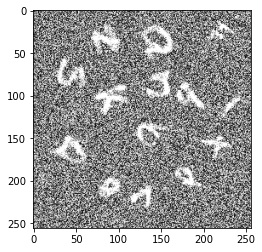

In [7]:
# 답지 확인
plt.imshow(train_image_list[0])

aws_str = ""
for i in range(0, len(one_hot_answer_list[0])) :
    if one_hot_answer_list[0][i] == 1 :
        aws_str = aws_str + alphabet[i] + " "
print(aws_str)

## 4. 학습 모델 구성

In [8]:


model = keras.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = train_image_list[0].shape))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(26, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 125, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0

## 5. 학습

In [10]:
one_hot_answer_list = np.array(one_hot_answer_list)
print(train_image_list.shape)
print(one_hot_answer_list.shape)

(50000, 256, 256, 3)
(50000, 26)


In [11]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_image_list, one_hot_answer_list, epochs=5)

## 6. 학습 결과 확인

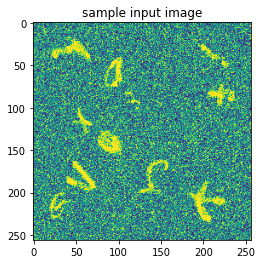

예측값 :  Index(['c', 'e', 'k', 'l', 'p', 'r', 't', 'v', 'x'], dtype='object')
정답값 :  Index(['d', 'e', 'f', 'g', 'i', 'j', 'k', 'm', 't', 'v', 'x'], dtype='object')


## 7. 앙상블 적용

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 0, 0]])

## 8. 제출파일 생성

In [13]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.iloc[:,1:] = predictions_mean
sample_submission.to_csv("baseline_prediction.csv", index = False)
sample_submission

,index,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,50000,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,50001,1,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1
2,50002,1,1,0,1,0,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0
3,50003,0,1,0,0,0,1,1,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0
4,50004,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,54995,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1
4996,54996,1,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1
4997,54997,1,1,0,1,0,1,1,0,0,1,0,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1
4998,54998,1,0,1,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1,1,0,1,1
